## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [1]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

Text(0,0.5,'price')

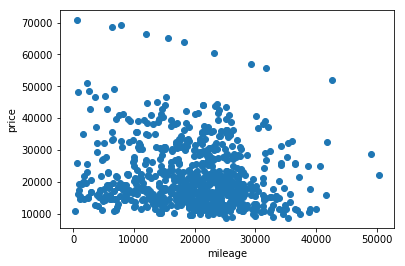

In [3]:
# Put the command (or commands) here that would give answer to the above question.
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(cars.Mileage, cars.Price)
plt.xlabel('mileage')
plt.ylabel('price')

#There appears to be evidence of a negative correlation between price and mileage.

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [4]:
# Linear regression model:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(cars.Mileage, cars.Price)
# Show summary statistics for the model:
print('slope: {} \nintercept: {} \nr^2: {} \np: {} \nstd error: {} '.format(slope, intercept, r_value**2, p_value, std_err))

slope: -0.17252050260202134 
intercept: 24764.558991201993 
r^2: 0.020463447285560946 
p: 4.684698031518038e-05 
std error: 0.04214775583437192 


<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [5]:
# Command:
slope
# One sentence summary:
# For every increase in mileage the value of the car decreases 17 cents. 

-0.17252050260202134

<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [6]:
# Single command
intercept

# $24,764.56

24764.558991201993

<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

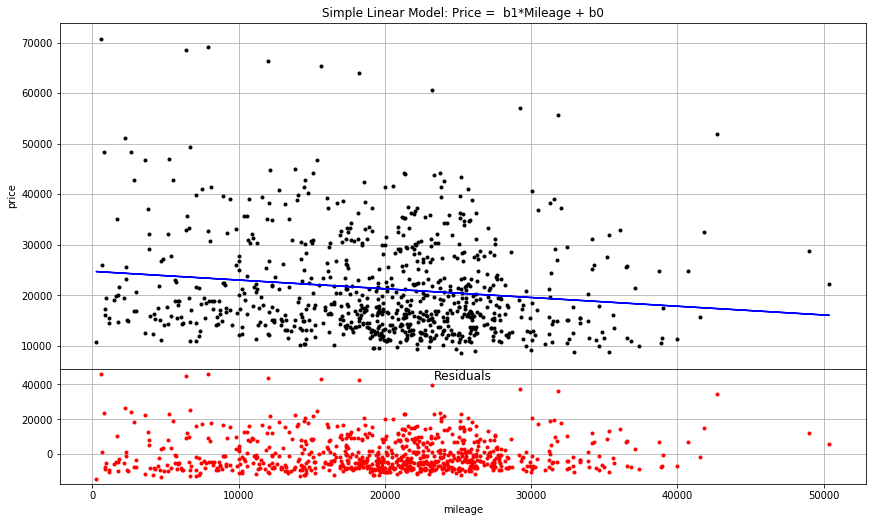

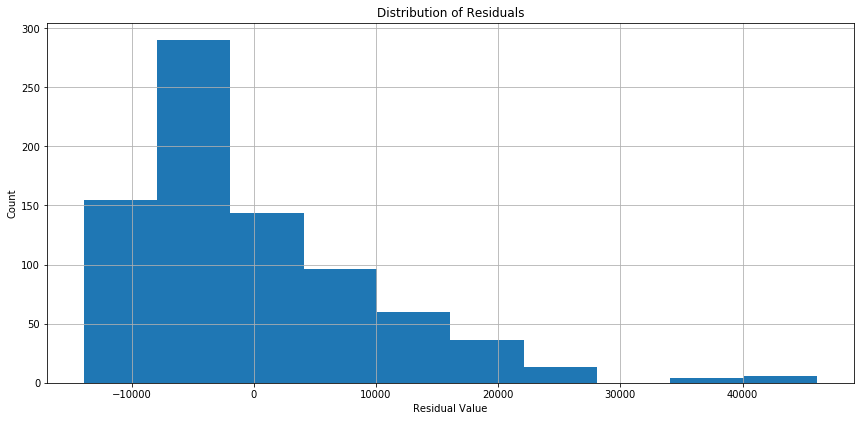

In [7]:
# Plot residuals

#Model
Fx = lambda x: x*slope+intercept

#PLOT
fig1 = plt.figure(1, figsize=(14, 8))
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6)) 
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(cars.Mileage,cars.Price,'.k') #data
plt.plot(cars.Mileage,Fx(cars.Mileage),'-b') #model
plt.title("Simple Linear Model: Price =  b1*Mileage + b0")
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.ylabel('price')
plt.grid()

#Residual plot
difference = cars.Price - Fx(cars.Mileage)
frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.plot(cars.Mileage,difference,'.r')
plt.title('Residuals', position=(.5, .85))
plt.xlabel('mileage')
plt.grid()

#Residual Histogram
fig2 = plt.figure(2, figsize=(14, 5))
frame3=fig2.add_axes((.1,1,.8,1))
plt.hist(difference)
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.grid()

# Explain whether there are any problems (1-2 sentence)
# The residuals are not normally distributed, violating one of the core assumptions of the linear model. 
# They are negatively skewed, with a high kurtosis of the posetive tail.

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [8]:
# Commands:
import statsmodels.api as sm

features = cars[['Mileage',
                 'Cylinder',
                 'Doors',
                 'Cruise',
                 'Sound',
                 'Leather']]

labels = cars.Price

model = sm.OLS(labels,features).fit()

model.summary()

# Explanation:
# The model is much better. The r squared statistic increased from .02 to .90.  The model went from explaining very little
# of the variation in price to the majority of the variation in price.

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1198.
Date:                Wed, 17 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:52:03   Log-Likelihood:                -8307.5
No. Observations:                 804   AIC:                         1.663e+04
Df Residuals:                     798   BIC:                         1.666e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage       -0.1196      0.030     -4.030      0.000      -0.178      -0.061
Cylinder    3615.2074    178.201     20.287      0.000    3265.409    3965.006
Doors       -635.4939    236.775     -2.684      0.007   -1100.270    -170.718
Cruise      6528.7484    653.250      9.994      0.000    5246.457    7811.040
Sound      -1350.7612    552.468     -2.445      0.015   -2435.224    -266.298
Leather     3806.1630    591.652      6.433      0.000    2644.786    4967.540
==============================================================================
Omnibus:                      148.684   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.645
Skew:                           1.114   Prob(JB):                     2.07e-58
Kurtosis:                       4.723   Cond. No.                     5.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

\# Command(s):

\# Comment on the result  
Although the predictors fail individual t-tests, the overall regression is significant, i.e. the predictors are jointly informative, according to the F-test. 

<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [9]:
#chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1)
# Commands that estimate the price of 'chevy' using the model with 6 predictors
import numpy as np

chevy = np.array([30000.0, 4.0, 2.0, 1.0, 1.0, 1.0], ndmin=2)

print(model.predict(exog = chevy))

[18586.24985184]


<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [10]:
# Commands
features = cars.iloc[:, 1:]
labels = cars.Price

chevy_full = np.array([30000.0, 4.0, 2.0, 1.0, 1.0, 1.0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], ndmin=2)

model = sm.OLS(labels,features).fit()

model.summary()

print(model.predict(exog = chevy_full))

# The main problem that I see from a common sense perspective is that the price of the car dropped from $18.5k 
# down to $7.5k by including the body type and brand. This in it self is not surprising, but when we look at the 
# scatter plot in question #5 we see that this is a very low value even for a car with 30k miles on it.

[7520.45931089]


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     607.2
Date:                Wed, 17 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:52:04   Log-Likelihood:                -7544.8
No. Observations:                 804   AIC:                         1.512e+04
Df Residuals:                     789   BIC:                         1.519e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Mileage        -0.1842      0.013    -14.664      0.000      -0.209      -0.160
Cylinder     3659.4543    113.345     32.286      0.000    3436.961    3881.947
Doors        1654.6326    174.525      9.481      0.000    1312.044    1997.221
Cruise        340.8695    295.962      1.152      0.250    -240.096     921.835
Sound         440.9169    234.484      1.880      0.060     -19.370     901.204
Leather       790.8220    249.745      3.167      0.002     300.579    1281.065
Buick       -1911.3752    336.292     -5.684      0.000   -2571.507   -1251.243
Cadillac      1.05e+04    409.274     25.663      0.000    9699.900    1.13e+04
Chevy       -3408.2863    213.274    -15.981      0.000   -3826.937   -2989.635
Pontiac     -4258.9628    256.358    -16.613      0.000   -4762.188   -3755.737
Saab         9419.1227    331.211     28.438      0.000    8768.963    1.01e+04
Saturn      -2859.0803    358.709     -7.970      0.000   -3563.218   -2154.943
convertible  1.258e+04    525.984     23.922      0.000    1.15e+04    1.36e+04
coupe        1559.7620    395.946      3.939      0.000     782.531    2336.993
hatchback   -4977.3196    339.046    -14.680      0.000   -5642.858   -4311.782
sedan       -3064.7176    215.007    -14.254      0.000   -3486.771   -2642.665
wagon        1384.6400    364.920      3.794      0.000     668.311    2100.969
==============================================================================
Omnibus:                       68.748   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.096
Skew:                           0.376   Prob(JB):                     9.76e-49
Kurtosis:                       5.457   Cond. No.                     1.74e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""